In [314]:
import serial
import numpy as np
import matplotlib.pyplot as plt
import time

In [317]:
ser = serial.Serial('COM11', 115200, timeout=1)

In [77]:
ser.close()

In [300]:
def data_to_arr(data, variables=1):
    arr = np.zeros((len(data), variables))
    for i in range(len(data)):
        split = data[i].decode().split()
        assert(len(split) == variables)
        arr[i, :] = list(map(float, split))
    return arr

(2691, 2)
1.461437910366678


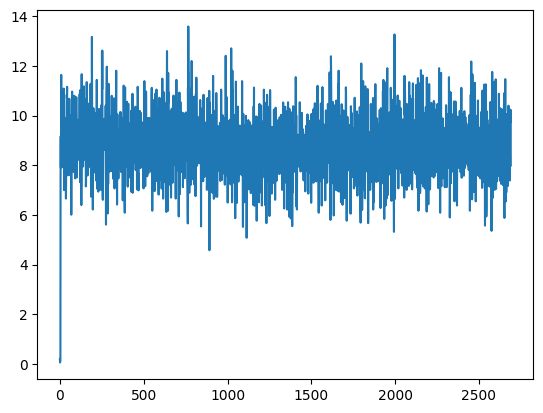

1

In [325]:
ser.write("255".encode())

time.sleep(5);

ser.reset_input_buffer()
data = ser.readlines(30000)
arr = data_to_arr(data, 2)
print(arr.shape)
print(np.var(arr[:, 0]))

plt.plot(arr[:, 0])
plt.show()

ser.write("0".encode())

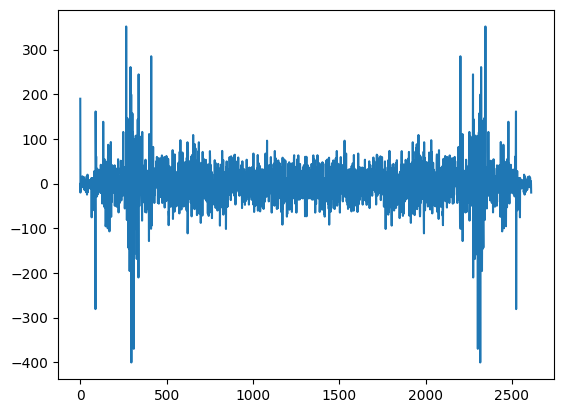

In [307]:
plt.plot(np.fft.fft(arr[:, 0]))

1.9286995599884031


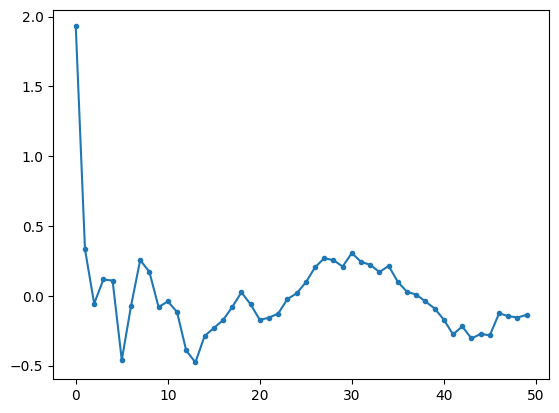

In [323]:
def auto_cov(signal):
    centered = signal - np.mean(signal)
    lags = np.arange(signal.shape[0])
    num_samples = signal.shape[0] - lags
    cov = np.correlate(centered, centered, 'full')[signal.shape[0]-1:] / num_samples
    return lags, cov

lags, cov = auto_cov(arr[:, 0])
print(cov[0])
plt.plot(cov[:50], '.-')
plt.show()

1.9286995599884031
1.8724970185388947
1.8662073687232692
1.8552721865687423
1.854048029665003
1.7310847489807715
1.7250615138040108
1.7038369143666168
1.6953596000160949
1.692541183667333


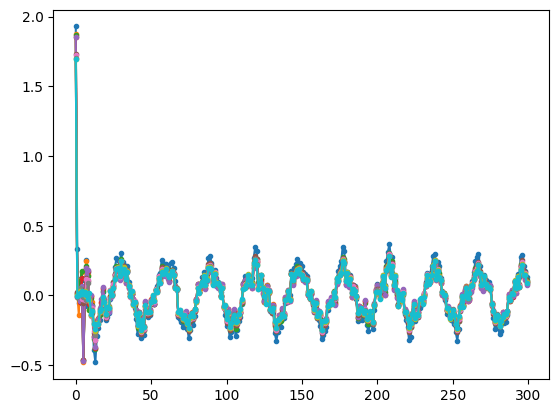

In [324]:
plt.plot(cov[0:300], '.-', label='0')
print(cov[0])
for nlags in range(1, 10):
    Cy = np.zeros((nlags, nlags))
    for i in range(nlags):
        for j in range(nlags):
            Cy[i, j] = cov[np.abs(i - j)]
    Cxy = cov[1:nlags+1].reshape((1, nlags))

    centered_data = arr[:, 0] - np.mean(arr[:, 0])
    N = centered_data.shape[0]

    y = np.zeros([arr.shape[0] - nlags-1, nlags])
    for i in range(nlags):
        y[:, i] = centered_data[nlags-i:N-i-1]

    x = centered_data[nlags+1:]

    xpred = (Cxy @ np.linalg.inv(Cy) @ y.T).flatten()
    err = (x - xpred)

    _, err_cov = auto_cov(err)
    print(err_cov[0])
    plt.plot(err_cov[0:300], '.-', label=f'{nlags}')
# plt.legend()
plt.show()